# Delivery Truck Trip Data

### Project Objectives
1. Define Your Objective

- Investigate factors influencing delivery times, such as distance, time of day, and day of the week.

2. Prepare the Data

- Load the Data: Use pandas to load the dataset.
- Basic Exploratory Data Analysis
- Clean the Data: Handle missing values, remove outliers, and correct any inaccuracies.
- Feature Engineering: Create new features relevant to your analysis, like delivery duration and time slots (morning, afternoon, evening).

3. Analyze the Data

- Statistical Summary: Generate descriptive statistics for delivery times and potential influencing factors.
- Correlation Analysis: Identify variables that are strongly correlated with delivery times.

4. Visualize Insights

- Trend Analysis: Use line plots or scatter plots to visualize trends in delivery times across different times or days.
- Heatmaps: Create heatmaps to show correlations between delivery times and other variables.
- Route Visualization: If geographic data is available, plot delivery routes to identify patterns related to delivery times.

5. Draw Conclusions

- Summarize key factors affecting delivery times based on your analysis and visualizations.

# Project - Delivery Truck Trip

### Importing Packages

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import folium
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
from sklearn.preprocessing import OrdinalEncoder

In [2]:
warnings.filterwarnings('ignore')

## 1. Define Your Objective:
- Investigate factors influencing delivery times, such as distance, time of day,and day of a week

For this we could consider below factors:
1. Origin_Location - Trip start place
2. Destination_Location - Trip end place
3. Planned_ETA: Planned Estimated Time of Arrival
4. actual_eta - Time when the truck arrived
5. ontime - If the truck arrived on time - calculated based on Planned and Actual ETA
6. delay - If the truck arrived with a delay - calculated based on Planned and Actual ETA
7. trip_start_date - Date/Time when trip started
8. trip_end_date Date/Time when trip ended - based on documentation (cant be considered for calculating delay)\
9. TRANSPORTATION_DISTANCE_IN_KM - Total KM of travel

## 2. Prepare the Data
- Load the Data: Use pandas to load the dataset.
- Basic Exploratory Data Anlysis
- Clean the Data: Handle missing values, remove outliers, and correct any inaccuracies.
- Feature Engineering: Create new features relevant to your analysis, like delivery duration and time slots (morning, afternoon, evening).

### Load the Data: Use pandas to load the dataset

In [3]:
df = pd.read_excel('Delivery truck trip data.xlsx')
df.head()

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,...,320.0,NaN,NaN,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:23,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,...,103.0,NaN,NaN,RAMESH,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:25,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,...,300.0,NaN,NaN,GIRI,NaN,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:25,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,...,61.0,NaN,NaN,RAVI,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,...,240.0,NaN,NaN,TAMIL,NaN,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


### Basic Exploratory Data Analysis

### Information of Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   GpsProvider                         5927 non-null   object        
 1   BookingID                           6880 non-null   object        
 2   Market/Regular                      6880 non-null   object        
 3   BookingID_Date                      6880 non-null   datetime64[ns]
 4   vehicle_no                          6880 non-null   object        
 5   Origin_Location                     6880 non-null   object        
 6   Destination_Location                6880 non-null   object        
 7   Org_lat_lon                         6880 non-null   object        
 8   Des_lat_lon                         6880 non-null   object        
 9   Data_Ping_time                      5927 non-null   datetime64[ns]
 10  Planned_ETA             

### Describe Dataset

In [5]:
df.describe()

,Curr_lat,Curr_lon,TRANSPORTATION_DISTANCE_IN_KM,Minimum_kms_to_be_covered_in_a_day,Driver_MobileNo
count,5927.000000,5927.000000,6168.000000,2820.000000,2.691000e+03
mean,18.679995,78.759745,553.856282,250.239362,8.598981e+09
std,6.075561,4.216357,758.981836,24.315485,1.131669e+09
min,8.166790,69.657698,0.000000,0.000000,6.000546e+09
25%,12.871868,76.891857,40.000000,250.000000,7.651505e+09
50%,17.470922,77.843340,160.000000,250.000000,8.930762e+09
75%,23.202009,80.018999,900.000000,250.000000,9.634981e+09
max,32.367928,95.529550,2954.700000,275.000000,1.000000e+10


### Checking for Missing Values

In [6]:
df.isnull().sum()

GpsProvider                            953
BookingID                                0
Market/Regular                           0
BookingID_Date                           0
vehicle_no                               0
Origin_Location                          0
Destination_Location                     0
Org_lat_lon                              0
Des_lat_lon                              0
Data_Ping_time                         953
Planned_ETA                              0
Current_Location                       964
DestinationLocation                      0
actual_eta                              37
Curr_lat                               953
Curr_lon                               953
ontime                                4332
delay                                 2538
OriginLocation_Code                      3
DestinationLocation_Code                27
trip_start_date                          0
trip_end_date                          194
TRANSPORTATION_DISTANCE_IN_KM          712
vehicleType

### N-Unique Values in Data

In [7]:
df.nunique()

GpsProvider                             29
BookingID                             6875
Market/Regular                           2
BookingID_Date                        6005
vehicle_no                            2325
Origin_Location                        180
Destination_Location                   520
Org_lat_lon                            173
Des_lat_lon                            522
Data_Ping_time                        3756
Planned_ETA                           6294
Current_Location                      2567
DestinationLocation                    520
actual_eta                            6580
Curr_lat                              4139
Curr_lon                              4109
ontime                                   1
delay                                    1
OriginLocation_Code                    178
DestinationLocation_Code               478
trip_start_date                       6107
trip_end_date                         4722
TRANSPORTATION_DISTANCE_IN_KM          564
vehicleType

### Dropping Featuers which seems unwanted

In [8]:
dropped_features = ['BookingID','vehicle_no','Current_Location','Driver_Name','Driver_MobileNo']
df = df.drop(dropped_features,axis=1)

## Clean the Data: Encode Data, Handle missing values, remove outliers, and correct any inaccuracies.

### Encode - Categorical Features

**Code Explanation**:
We are doing same for rest of the Date and Time Variables,
1. `pd.to_datetime(df['BookingID_Date'], format='%m/%d/%Y')`: This part converts the 'BookingID_Date' column in the DataFrame 'df' to datetime format. It uses the `pd.to_datetime()` function from the pandas library. The `format='%m/%d/%Y'` argument specifies the format of the date string in the 'BookingID_Date' column, where `%m` represents the month, `%d` represents the day, and `%Y` represents the year.

2. `booking_date.dt.year`, `booking_date.dt.month`, `booking_date.dt.day`: These lines extract the year, month, and day components of the datetime objects in the 'booking_date' Series using the `dt` accessor in pandas.

3. `pd.DataFrame({...})`: This part creates a new DataFrame called 'df_booking_date' with three columns: 'booking_year', 'booking_month', and 'booking_day', containing the extracted year, month, and day components, respectively.

4. `df = pd.concat([df,df_booking_date],axis=1)`: Finally, this line concatenates the original DataFrame 'df' with the 'df_booking_date' DataFrame along the columns axis (axis=1), effectively adding the new columns containing the booking date components to the original DataFrame.

In [9]:
booking_date = pd.to_datetime(df['BookingID_Date'], format='%m/%d/%Y')
df_booking_date = pd.DataFrame({
    'booking_year': booking_date.dt.year,
    'booking_month': booking_date.dt.month,
    'booking_day': booking_date.dt.day
})
df = pd.concat([df,df_booking_date],axis=1)

In [10]:
actual_dateTime = pd.to_datetime(df['actual_eta'],format='%m/%d/%y %H:%M')
df_actual_eta = pd.DataFrame({
    'actual_eta_day':actual_dateTime.dt.day,
    'actual_eta_month':actual_dateTime.dt.month,
    'actual_eta_year':actual_dateTime.dt.year,
    'actual_eta_hour':actual_dateTime.dt.hour,
    'actual_eta_min':actual_dateTime.dt.minute
})
df = pd.concat([df,df_actual_eta],axis=1)

In [11]:
trip_start_dateTime = pd.to_datetime(df['trip_start_date'],format='%m/%d/%y %H:%M')
df_trip_start_date = pd.DataFrame({
    'trip_start_date_day':trip_start_dateTime.dt.day,
    'trip_start_date_month':trip_start_dateTime.dt.month,
    'trip_start_date_year':trip_start_dateTime.dt.year,
    'trip_start_date_hour':trip_start_dateTime.dt.hour,
    'trip_start_date_min':trip_start_dateTime.dt.minute
})

df = pd.concat([df,df_trip_start_date],axis=1)

In [12]:
trip_end_dateTime = pd.to_datetime(df['trip_end_date'],format='%m/%d/%y %H:%M')
df_trip_end_date = pd.DataFrame({
    'trip_end_date_day':trip_end_dateTime.dt.day,
    'trip_end_date_month':trip_end_dateTime.dt.month,
    'trip_end_date_year':trip_end_dateTime.dt.year,
    'trip_end_date_hour':trip_end_dateTime.dt.hour,
    'trip_end_date_min':trip_end_dateTime.dt.minute
})

df = pd.concat([df,df_trip_end_date],axis=1)

In [13]:
data_ping_dateTime = pd.to_datetime(df['Data_Ping_time'],format='%m-%d-%y %H:%M:%S')
data_ping_dateTime = pd.DataFrame({
    'data_ping_date_day':data_ping_dateTime.dt.day,
    'data_ping_date_month':data_ping_dateTime.dt.month,
    'data_ping_date_year':data_ping_dateTime.dt.year,
    'data_ping_date_hour':data_ping_dateTime.dt.hour,
    'data_ping_date_min':data_ping_dateTime.dt.minute,
    'data_ping_date_seconds':data_ping_dateTime.dt.second

})
df = pd.concat([df,data_ping_dateTime],axis=1)

In [14]:
planned_eta = pd.to_datetime(df['Planned_ETA'],format='%m-%d-%y %H:%M:%S')
planned_eta = pd.DataFrame({
    'planned_eta_day':planned_eta.dt.day,
    'planned_eta_month':planned_eta.dt.month,
    'planned_eta_year':planned_eta.dt.year,
    'planned_eta_hour':planned_eta.dt.hour,
    'planned_eta_min':planned_eta.dt.minute,
    'planned_eta_seconds':planned_eta.dt.second

})
df = pd.concat([df,planned_eta],axis=1)

In [15]:
df = df.drop(['BookingID_Date','actual_eta','trip_start_date','trip_end_date','Planned_ETA','Data_Ping_time'],axis=1)

**Code Explanation:** We are converting these blow columns to_numeric. 

In [16]:
df_to_numeric = ['Curr_lat','Curr_lon','TRANSPORTATION_DISTANCE_IN_KM','Minimum_kms_to_be_covered_in_a_day']
df[df_to_numeric] = df[df_to_numeric].apply(pd.to_numeric)

**Code Explanation:** This code appears to be splitting two columns, 'Org_lat_lon' and 'Des_lat_lon', in a DataFrame 'df' based on the comma separator (','), converting the resulting substrings into floating-point numbers, and then creating new columns for latitude and longitude coordinates for both the origin ('Org_lat' and 'Org_lon') and destination ('Des_lat' and 'Des_lon').

Let's break it down:

1. `df[['Org_lat', 'Org_lon']] = df['Org_lat_lon'].str.split(',', expand=True).astype(float)`: This part splits the 'Org_lat_lon' column into two separate columns, 'Org_lat' and 'Org_lon', based on the comma separator (',') using the `str.split()` method. The `expand=True` argument ensures that the split results are expanded into separate columns. The `.astype(float)` converts the resulting substrings into floating-point numbers.

2. `df[['Des_lat', 'Des_lon']] = df['Des_lat_lon'].str.split(',', expand=True).astype(float)`: Similarly, this line splits the 'Des_lat_lon' column into two separate columns, 'Des_lat' and 'Des_lon', and converts the resulting substrings into floating-point numbers.

3. `df.drop(columns=['Org_lat_lon', 'Des_lat_lon'], inplace=True)`: Finally, this line drops the original 'Org_lat_lon' and 'Des_lat_lon' columns from the DataFrame 'df'. The `inplace=True` argument ensures that the DataFrame is modified in place, meaning the changes are applied directly to the original DataFrame without the need to create a new one.

In [17]:
df[['Org_lat', 'Org_lon']] = df['Org_lat_lon'].str.split(',', expand=True).astype(float)
df[['Des_lat', 'Des_lon']] = df['Des_lat_lon'].str.split(',', expand=True).astype(float)
df.drop(columns=['Org_lat_lon', 'Des_lat_lon'], inplace=True)

**Code Explanation:** This code performs ordinal encoding on selected categorical columns in a DataFrame 'df' and then drops the original object-type columns.

Here's what each part does:

1. `encoder = OrdinalEncoder()`: This line creates an instance of the `OrdinalEncoder` class, which is used to encode categorical features as ordinal integers.

2. `categorical = [...]`: This list contains the names of the columns in the DataFrame that need to be encoded.

3. `for cols in categorical:`: This loop iterates over each column name in the 'categorical' list.

4. `df[[cols]] = encoder.fit_transform(df[[cols]])`: Within each iteration of the loop, this line applies the `fit_transform` method of the `OrdinalEncoder` object to encode the values in the current column ('cols'). The `fit_transform` method fits the encoder to the unique values in the column and then transforms those values into ordinal integers. The result is assigned back to the corresponding column in the DataFrame 'df'.

5. `df = df.drop(df.select_dtypes('object').columns,axis=1)`: After encoding all categorical columns, this line drops any remaining columns in the DataFrame that have an object data type. It uses the `select_dtypes('object')` method to select columns with object data types and then drops them using the `drop` method along the columns axis (axis=1). The result is assigned back to the DataFrame 'df'. This step ensures that only numerical features remain in the DataFrame, which is often necessary for machine learning algorithms that require numerical input.

In [19]:
encoder = OrdinalEncoder()
categorical = ['GpsProvider', 'Market/Regular ', 'Origin_Location',
       'Destination_Location', 'DestinationLocation', 'ontime', 'delay','vehicleType',
       'customerID', 'customerNameCode', 'supplierNameCode',
       'Material Shipped']

for cols in categorical:
    df[[cols]] = encoder.fit_transform(df[[cols]])
df = df.drop(df.select_dtypes('object').columns,axis=1)

### Handling Missing Values
**Code Explanation:** This code fills missing values in the DataFrame 'df' with the mode (most frequent value) of each column.

Here's what each part does:

1. `df.mode()`: This computes the mode of each column in the DataFrame. The mode is the value that appears most frequently in each column.

2. `df.mode().iloc[0]`: After computing the mode for each column, this selects the first row of the resulting DataFrame. Since the `mode()` function returns a DataFrame with one row containing the mode for each column, `iloc[0]` selects this row.

3. `df.fillna(df.mode().iloc[0])`: Finally, this fills missing values in the original DataFrame 'df' with the mode values computed in the previous step. The `fillna()` function is used to replace missing (NaN) values with specified values. In this case, it replaces missing values with the mode values obtained from `df.mode().iloc[0]`.

This code essentially replaces missing values in each column with the most frequent value (mode) found in that column.

In [21]:
df  = df.fillna(df.mode().iloc[0])

In [22]:
df.isnull().sum()

GpsProvider                           0
Market/Regular                        0
Origin_Location                       0
Destination_Location                  0
DestinationLocation                   0
Curr_lat                              0
Curr_lon                              0
ontime                                0
delay                                 0
TRANSPORTATION_DISTANCE_IN_KM         0
vehicleType                           0
Minimum_kms_to_be_covered_in_a_day    0
customerID                            0
customerNameCode                      0
supplierNameCode                      0
Material Shipped                      0
booking_year                          0
booking_month                         0
booking_day                           0
actual_eta_day                        0
actual_eta_month                      0
actual_eta_year                       0
actual_eta_hour                       0
actual_eta_min                        0
trip_start_date_day                   0


### Checking for an outliers

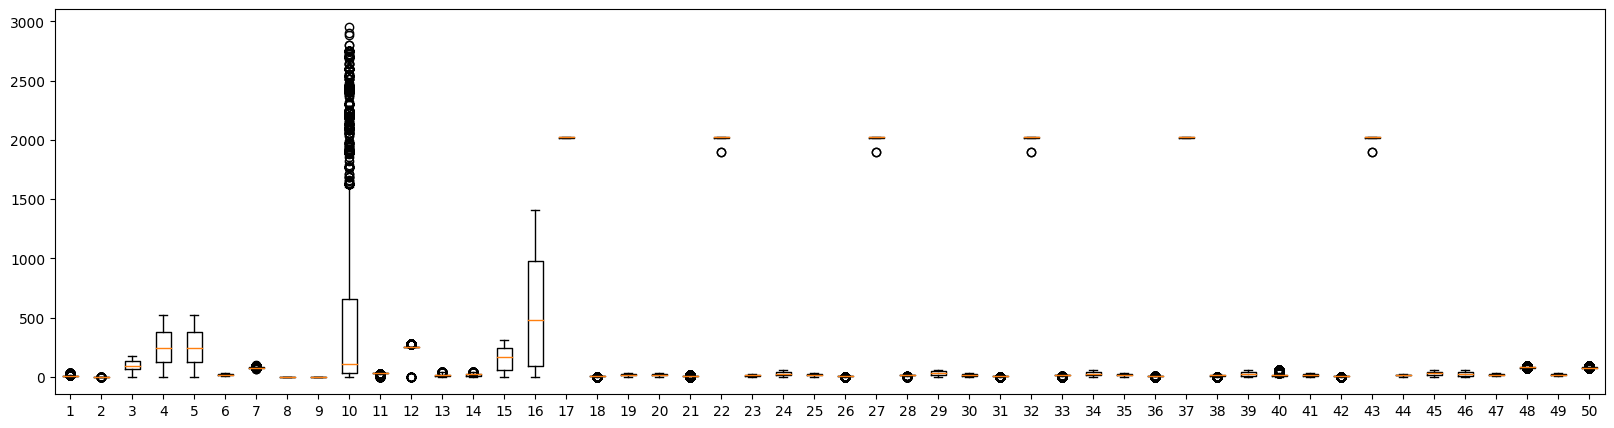

In [23]:
plt.figure(figsize=(20,5))
plt.boxplot(df)
plt.show()

### Removing Outliers

**Code Explanation:** This code snippet performs outlier removal using the Interquartile Range (IQR) method. Here's how it works:

1. **Calculate Quartiles and Interquartile Range (IQR):**
   - `Q1 = df.quantile(0.25)`: Compute the first quartile (25th percentile) for each column in the DataFrame 'df'.
   - `Q3 = df.quantile(0.75)`: Compute the third quartile (75th percentile) for each column in the DataFrame 'df'.
   - `IQR = Q3 - Q1`: Calculate the interquartile range (IQR) for each column by subtracting the first quartile from the third quartile.

2. **Define Lower and Upper Boundaries for Outliers:**
   - `threshold = 1.5`: This is a constant multiplier that determines how far out the lower and upper bounds should be from the quartiles. Commonly, a threshold of 1.5 is used.
   - `lower_bound = Q1 - threshold * IQR`: Calculate the lower bound for outliers by subtracting a multiple of the IQR from the first quartile.
   - `upper_bound = Q3 + threshold * IQR`: Calculate the upper bound for outliers by adding a multiple of the IQR to the third quartile.

3. **Filter Outliers:**
   - `df_NoOutliers = df[(df >= lower_bound) & (df <= upper_bound)]`: Create a new DataFrame 'df_NoOutliers' containing only the rows where the values are within the lower and upper bounds calculated in the previous step. This effectively removes outliers.
   
4. **Update Original DataFrame:**
   - `df = df_NoOutliers.copy()`: Update the original DataFrame 'df' with the outlier-filtered data from 'df_NoOutliers'. This step is optional and depends on whether you want to keep the original DataFrame intact or not.

Overall, this code helps to identify and remove outliers from the DataFrame based on the specified threshold and the IQR method.

In [24]:
threshold = 1.5
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

df_NoOutliers = df[(df >= lower_bound) & (df <= upper_bound)]
df = df_NoOutliers.copy()

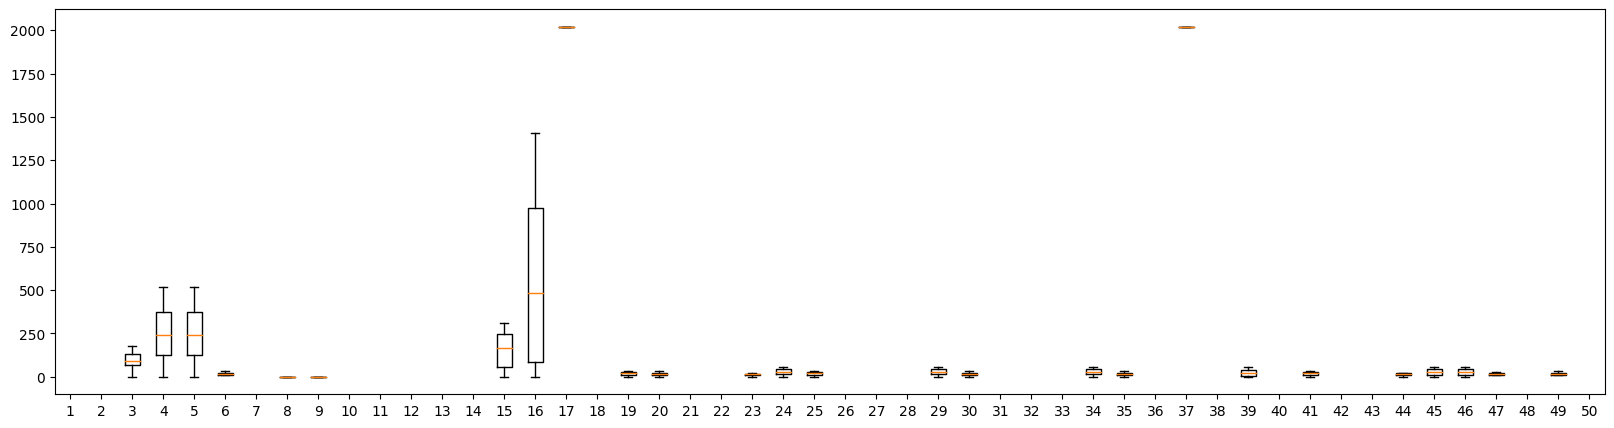

In [25]:
plt.figure(figsize=(20,5))
plt.boxplot(df)
plt.show()

In [26]:
df  = df.fillna(df.mode().iloc[0])

### Feature Engineering
- trip_end_date DATE/TIME Converting it 3 categories Moring Afternoon and Evening

In [27]:
def categorize_time(hour):
    if 0 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['delivery_time_cateogry'] = df['actual_eta_hour'].apply(categorize_time)

## 3. Analyze the Data

- Statistical Summary: Generate descriptive statistics for delivery times and potential influencing factors.
- Correlation Analysis: Identify variables that are strongly correlated with delivery times.

### Statistical Summary: Generate descriptive statistics for delivery times and potential influencing factors.

In [28]:
# Considering Actual_eta_hour and actual)eta_minute
deliver_time_cols = ['actual_eta_hour','actual_eta_min']
delivery_time_stat = df[deliver_time_cols].describe()
delivery_time_stat

,actual_eta_hour,actual_eta_min
count,6880.000000,6880.000000
mean,12.634302,28.054506
std,6.242750,16.992950
min,0.000000,0.000000
25%,9.000000,15.000000
50%,14.000000,26.000000
75%,17.000000,43.000000
max,23.000000,59.000000


In [29]:
influencing_features = ['Curr_lat','Curr_lon','TRANSPORTATION_DISTANCE_IN_KM','Minimum_kms_to_be_covered_in_a_day']
influencing_featuers_stat = df[influencing_features].describe()
influencing_featuers_stat

,Curr_lat,Curr_lon,TRANSPORTATION_DISTANCE_IN_KM,Minimum_kms_to_be_covered_in_a_day
count,6880.000000,6880.000000,6880.000000,6880.0
mean,18.511478,78.210525,238.663779,250.0
std,5.654672,1.401851,370.194232,0.0
min,8.166790,73.280440,0.000000,250.0
25%,12.991093,77.689743,25.000000,250.0
50%,17.463420,78.197760,49.000000,250.0
75%,22.996990,78.308797,240.000000,250.0
max,32.367928,83.515870,1600.000000,250.0


### Correlation Analysis: Identify variables that are strongly correlated with delivery times
**Code Explanation:** This code computes the correlation matrix for the DataFrame `df`, then extracts the correlation of each feature with the column `actual_eta_hour`, sorts these correlations in descending order, and finally prints the sorted correlation values.

Here's a breakdown of each step:

1. **Compute Correlation Matrix**:
   - `correlation_matrix = df.corr()`: Calculates the pairwise Pearson correlation coefficients between all pairs of columns in the DataFrame `df`. This results in a correlation matrix where each entry (i, j) represents the correlation between column i and column j.

2. **Extract Correlation with 'actual_eta_hour'**:
   - `correlation_matrix_delivery_time = correlation_matrix['actual_eta_hour']`: Selects the column corresponding to 'actual_eta_hour' from the correlation matrix. This column contains the correlation coefficients between 'actual_eta_hour' and all other columns in the DataFrame.

3. **Sort Correlation Values**:
   - `correlation_matrix_delivery_time_sort = correlation_matrix_delivery_time.sort_values(ascending=False)`: Sorts the correlation values in descending order. This step arranges the features based on their correlation strength with 'actual_eta_hour', with the most positively correlated features appearing first.

4. **Print Sorted Correlation Values**:
   - `print(correlation_matrix_delivery_time_sort)`: Outputs the sorted correlation values to the console. This provides insight into which features are most strongly correlated (positively or negatively) with the delivery time represented by 'actual_eta_hour'.

In summary, this code helps to identify the features that have the highest correlation with the delivery time, which can be useful for understanding the factors influencing the delivery process.

In [30]:
correlation_matrix = df.corr()
correlation_matrix_delivery_time = correlation_matrix['actual_eta_hour']
correlation_matrix_delivery_time_sort = correlation_matrix_delivery_time.sort_values(ascending=False)
print(correlation_matrix_delivery_time_sort)

actual_eta_hour                       1.000000
trip_end_date_hour                    0.291610
data_ping_date_hour                   0.229138
planned_eta_hour                      0.154482
trip_end_date_day                     0.071689
data_ping_date_year                   0.060073
trip_start_date_day                   0.046981
planned_eta_day                       0.042146
Des_lon                               0.038073
trip_end_date_min                     0.036049
Curr_lon                              0.031132
GpsProvider                           0.029796
booking_day                           0.029703
data_ping_date_min                    0.022401
supplierNameCode                      0.014757
Material Shipped                      0.012401
Org_lon                               0.009608
actual_eta_day                        0.003825
planned_eta_seconds                   0.002163
actual_eta_min                       -0.000333
customerNameCode                     -0.001735
planned_eta_m

## 4. Visualize Insights

- Trend Analysis: Use line plots or scatter plots to visualize trends in delivery times across different times or days.
- Heatmaps: Create heatmaps to show correlations between delivery times and other variables.
- Route Visualization: If geographic data is available, plot delivery routes to identify patterns related to delivery times.

### Trend Analysis: Use line plots or scatter plots to visualize trends in delivery times across different times or days.

Transportation Distance In KM Vs Delivery Time Day

<AxesSubplot: xlabel='TRANSPORTATION_DISTANCE_IN_KM', ylabel='actual_eta_hour'>

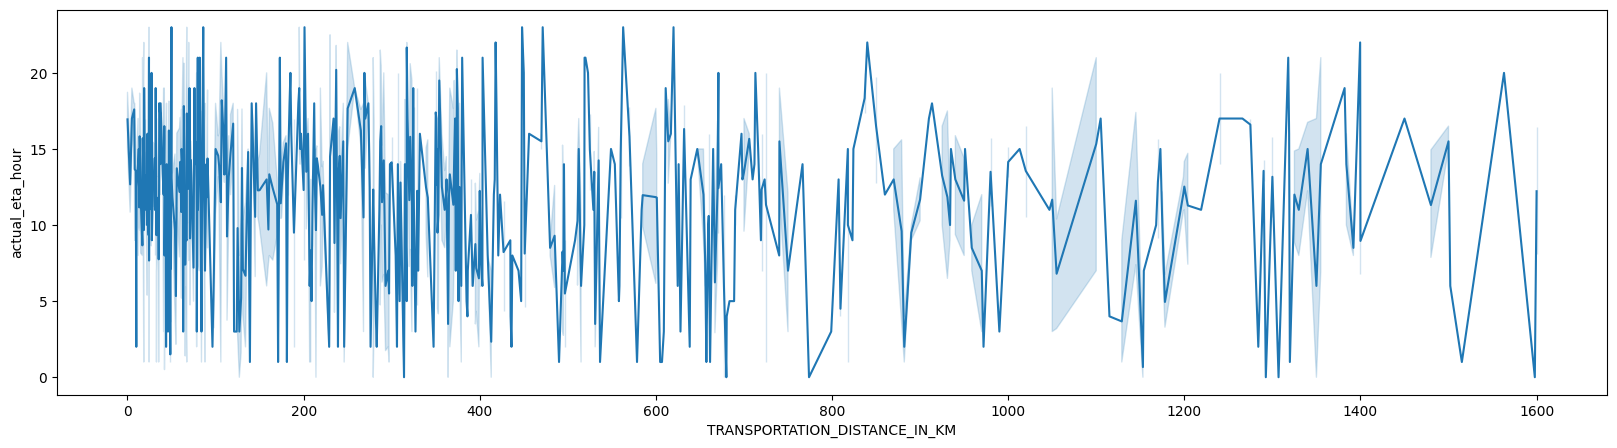

In [31]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df,x='TRANSPORTATION_DISTANCE_IN_KM',y='actual_eta_hour')

Trip End Hour vs Delivery Time Hour

<AxesSubplot: xlabel='trip_end_date_hour', ylabel='actual_eta_hour'>

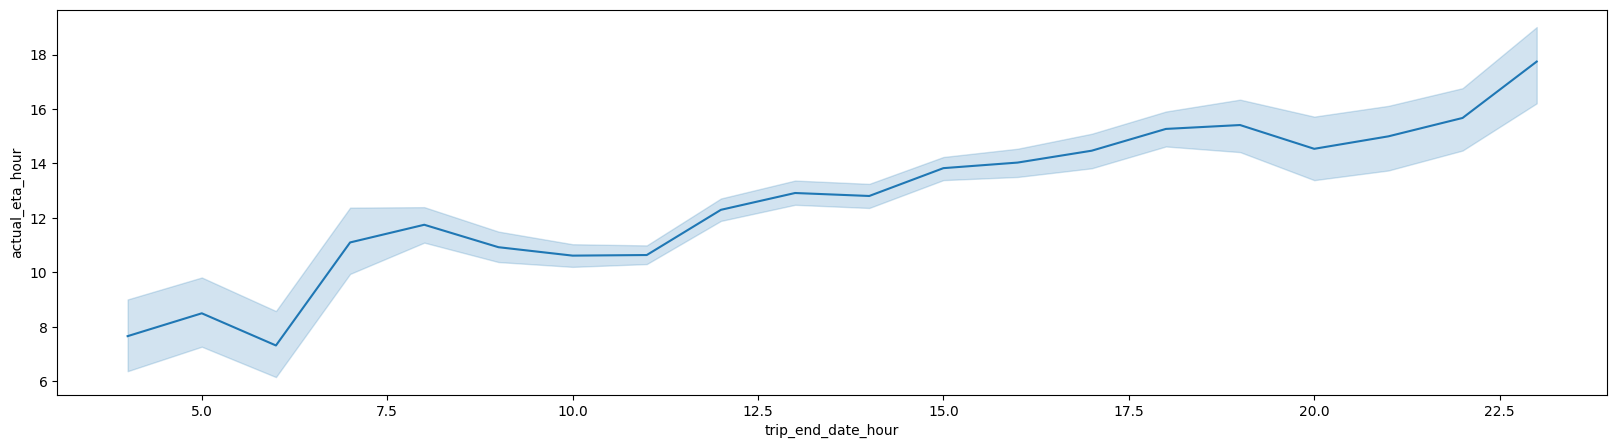

In [32]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df,x='trip_end_date_hour',y='actual_eta_hour')

### Destination Location vs Delivery time

<AxesSubplot: xlabel='Destination_Location', ylabel='actual_eta_hour'>

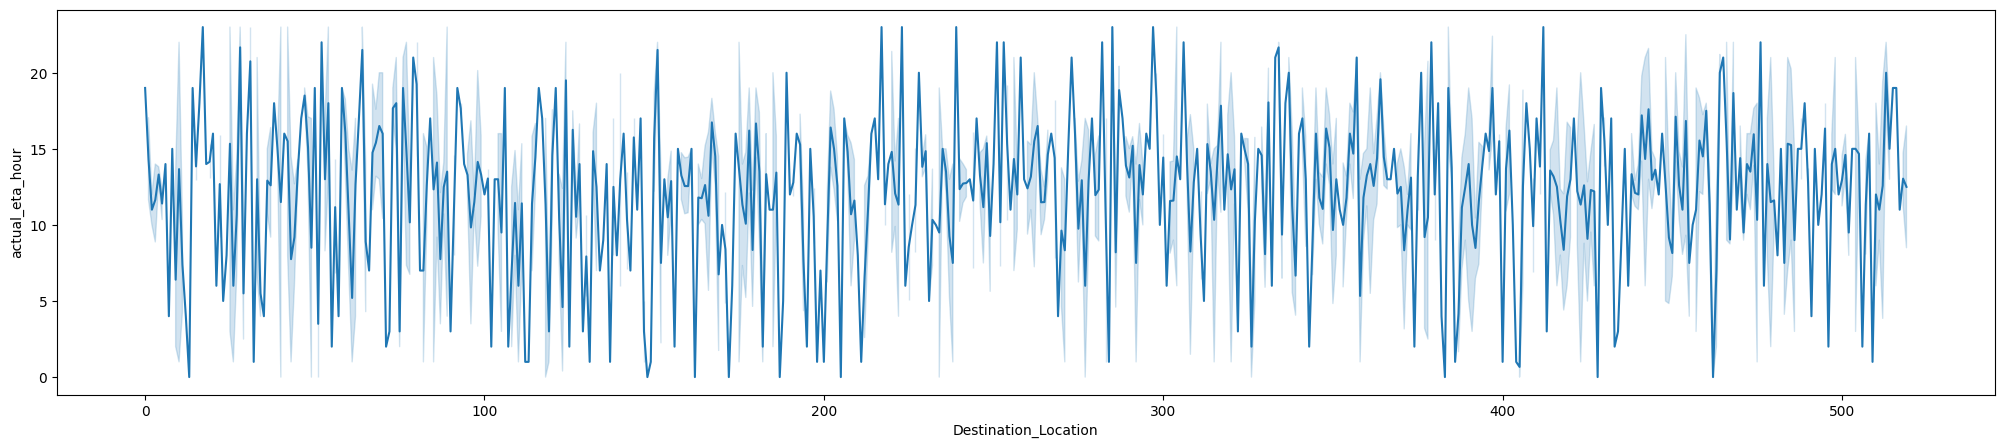

In [33]:
plt.figure(figsize=(25,5))
sns.lineplot(data=df,x='Destination_Location',y='actual_eta_hour')

Frequency Table of Delivery Time - Morning, Afternoon, Evening

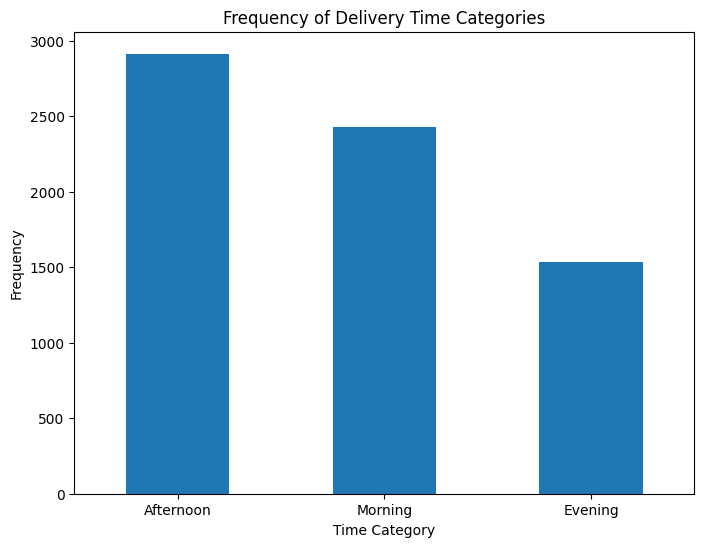

In [34]:
time_category_counts = df['delivery_time_cateogry'].value_counts()

# Plot the frequency counts as a bar plot
plt.figure(figsize=(8, 6))
time_category_counts.plot(kind='bar')
plt.title('Frequency of Delivery Time Categories')
plt.xlabel('Time Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

### Heatmaps: Create heatmaps to show correlations between delivery times and other variables.

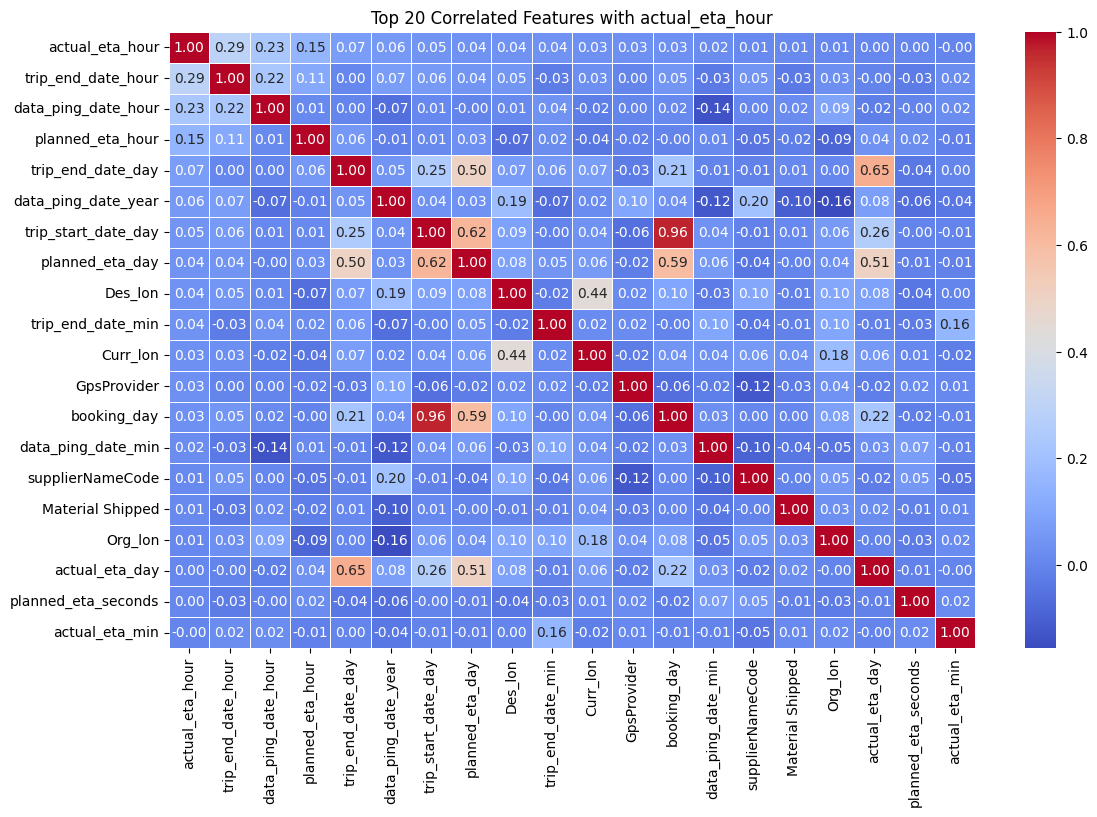

In [35]:
top_corr_features = correlation_matrix_delivery_time_sort.head(20)
top_corr_matrix = correlation_matrix.loc[top_corr_features.index, top_corr_features.index]
plt.figure(figsize=(13, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f'Top {20} Correlated Features with actual_eta_hour')
plt.show()

### Route Visualization: If geographic data is available, plot delivery routes to identify patterns related to delivery times.

**Code Explanation:** This code utilizes the Folium library to create an interactive map visualization showing delivery routes between origin and destination locations. Here's a breakdown of the code:

1. **Create a Map Object**:
   - `m = folium.Map(location=[df['Org_lat'].mean(), df['Org_lon'].mean()], zoom_start=10)`: Initializes a Folium map centered at the mean latitude and longitude of the origin locations. The `zoom_start` parameter sets the initial zoom level of the map.

2. **Iterate Over DataFrame Rows**:
   - `for index, row in df.iterrows():`: Loops through each row in the DataFrame `df`.

3. **Add Markers for Origin and Destination**:
   - `folium.Marker(location=[row['Org_lat'], row['Org_lon']], popup='Origin').add_to(m)`: Adds a marker at the origin location specified by the latitude and longitude coordinates in the current row. The popup displays the text 'Origin'.
   - `folium.Marker(location=[row['Des_lat'], row['Des_lon']], popup='Destination').add_to(m)`: Adds a marker at the destination location specified by the latitude and longitude coordinates in the current row. The popup displays the text 'Destination'.

4. **Draw Polylines for Delivery Routes**:
   - `folium.PolyLine(locations=[(row['Org_lat'], row['Org_lon']), (row['Des_lat'], row['Des_lon'])], color='blue').add_to(m)`: Draws a polyline connecting the origin and destination locations specified by the latitude and longitude coordinates in the current row. The `color` parameter sets the color of the polyline to blue.

5. **Save the Map Visualization**:
   - `m.save('map.html')`: Saves the map visualization as an HTML file named 'delivery_routes.html' in the current working directory.

In [42]:
# Check Map.html for realistic geographical
m = folium.Map(location=[df['Org_lat'].mean(), df['Org_lon'].mean()], zoom_start=10)

for index, row in df.iterrows():
    folium.Marker(location=[row['Org_lat'], row['Org_lon']], popup='Origin').add_to(m)
    folium.Marker(location=[row['Des_lat'], row['Des_lon']], popup='Destination').add_to(m)
    folium.PolyLine(locations=[(row['Org_lat'], row['Org_lon']), (row['Des_lat'], row['Des_lon'])], color='blue').add_to(m)

m.save('map.html')

**Code Explanation:** This code creates a subplot with two panels, side by side, each showing a scatter plot of geographical locations (latitude and longitude) for origin and destination points. Here's how it works:

1. **Create Subplots**:
   - `fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})`: Initializes a figure with two subplots arranged in a single row (`1`) and two columns (`2`). Each subplot will use the Plate Carrée projection (`ccrs.PlateCarree()`). The `figsize` parameter sets the size of the figure.

2. **Scatter Plot for Origin Locations**:
   - `origin_lats = df['Org_lat']`: Extracts the latitude values of origin locations from the DataFrame.
   - `origin_lons = df['Org_lon']`: Extracts the longitude values of origin locations from the DataFrame.
   - `ax1.scatter(origin_lons, origin_lats, color='red', marker='o', label='Origin')`: Plots a scatter plot of origin locations on the first subplot (`ax1`). The `color` parameter sets the color of the markers to red, and the `marker` parameter sets the marker style to circles ('o'). The label is set to 'Origin' for the legend.
   - `ax1.set_title('Origin Locations')`: Sets the title of the first subplot to 'Origin Locations'.
   - `ax1.coastlines()`, `ax1.add_feature(cartopy.feature.BORDERS)`, `ax1.gridlines(draw_labels=True)`: Adds coastlines, borders, and gridlines to the first subplot.

3. **Scatter Plot for Destination Locations**:
   - Similar to the process for origin locations, this section extracts latitude and longitude values for destination locations (`dest_lats`, `dest_lons`) and creates a scatter plot on the second subplot (`ax2`). The markers are blue, and the label is set to 'Destination' for the legend.

4. **Display the Legend and Show the Plot**:
   - `plt.legend()`: Displays the legend containing the labels 'Origin' and 'Destination'.
   - `plt.show()`: Displays the entire plot with both subplots.

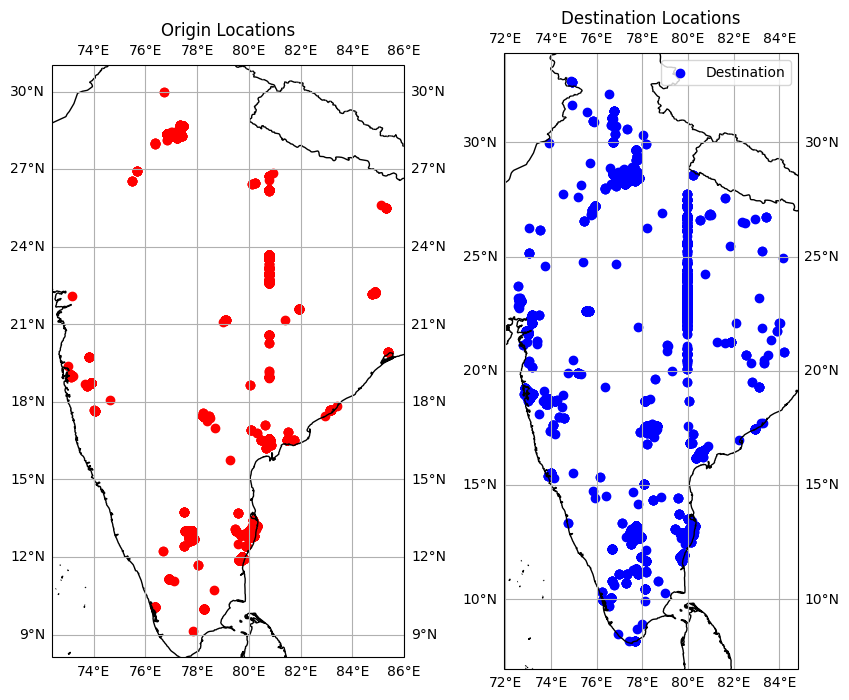

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

origin_lats = df['Org_lat']
origin_lons = df['Org_lon']
ax1.scatter(origin_lons, origin_lats, color='red', marker='o', label='Origin')
ax1.set_title('Origin Locations')
ax1.coastlines()
ax1.add_feature(cartopy.feature.BORDERS)
ax1.gridlines(draw_labels=True)

dest_lats = df['Des_lat']
dest_lons = df['Des_lon']
ax2.scatter(dest_lons, dest_lats, color='blue', marker='o', label='Destination')
ax2.set_title('Destination Locations')
ax2.coastlines()
ax2.add_feature(cartopy.feature.BORDERS)
ax2.gridlines(draw_labels=True)

plt.legend()
plt.show()


**Code Explanation:** This code generates a plot displaying both origin and destination locations, along with routes connecting them. Here's a breakdown of how it works:

1. **Create Subplot**:
   - `fig, ax = plt.subplots(figsize=(15,15),subplot_kw={'projection': ccrs.PlateCarree()})`: Initializes a figure and subplot with Plate Carrée projection. The subplot has a specified size of 15x15 inches.

2. **Plot Origin and Destination Locations**:
   - Latitude and longitude coordinates for origin and destination locations are extracted from the DataFrame (`origin_lats`, `origin_lons`, `dest_lats`, `dest_lons`).
   - `ax.scatter(origin_lons, origin_lats, color='red', marker='o', label='Origin')`: Plots origin locations as red circles.
   - `ax.scatter(dest_lons, dest_lats, color='blue', marker='o', label='Destination')`: Plots destination locations as blue circles.

3. **Plot Routes**:
   - A loop iterates over the length of the origin latitude coordinates.
   - For each pair of origin and destination locations, a dashed green line is drawn to represent the route (`ax.plot(..., color='green', linestyle='--')`).

4. **Add Map Features**:
   - `ax.coastlines()`, `ax.add_feature(cartopy.feature.BORDERS)`, `ax.gridlines(draw_labels=True)`: Adds coastlines, borders, and gridlines to the plot.

5. **Set Title and Legend**:
   - `plt.title('Origin and Destination Locations with Routes')`: Sets the title of the plot.
   - `plt.legend()`: Displays the legend containing labels for origin and destination locations.

6. **Show Plot**:
   - `plt.show()`: Displays the plot with the origin and destination locations, along with routes connecting them.

Overall, this code provides a comprehensive visualization of origin and destination locations, along with the routes connecting them, using different markers and colors for clarity.

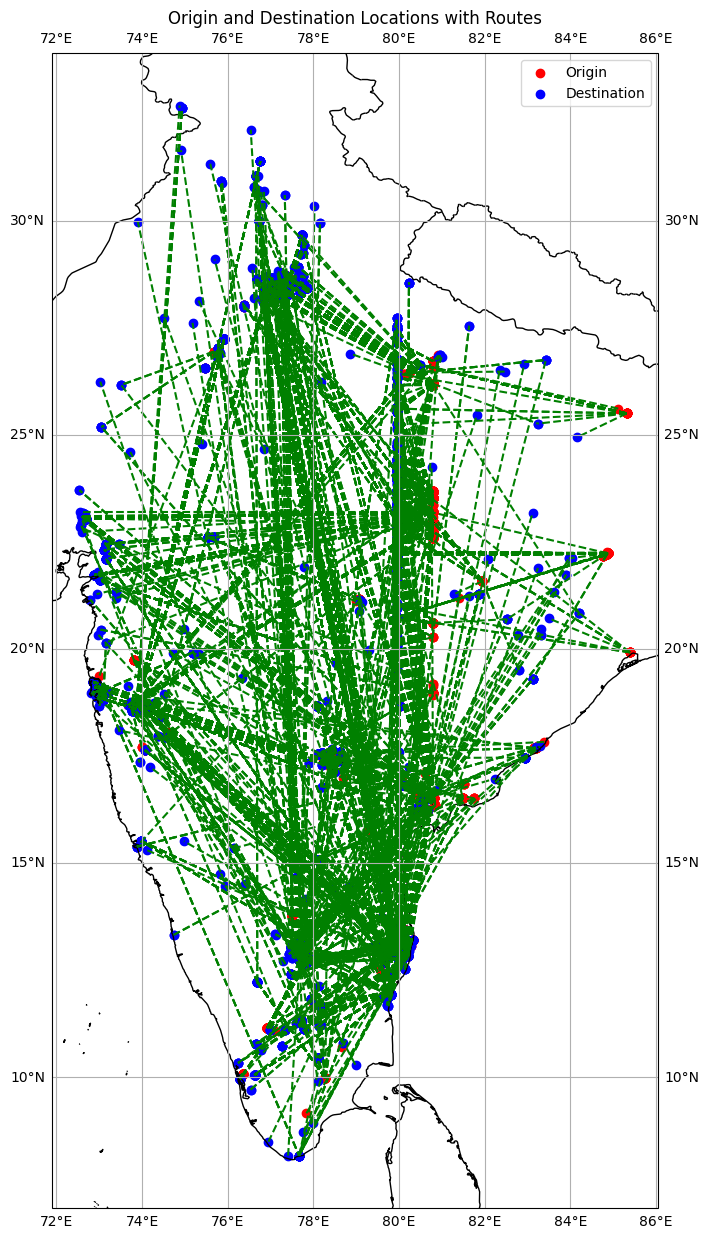

In [67]:
fig, ax = plt.subplots(figsize=(15,15),subplot_kw={'projection': ccrs.PlateCarree()})

origin_lats = df['Org_lat']
origin_lons = df['Org_lon']
ax.scatter(origin_lons, origin_lats, color='red', marker='o', label='Origin')


dest_lats = df['Des_lat']
dest_lons = df['Des_lon']
ax.scatter(dest_lons, dest_lats, color='blue', marker='o', label='Destination')

for i in range(len(origin_lats)):
    ax.plot([origin_lons[i], dest_lons[i]], [origin_lats[i], dest_lats[i]], color='green', linestyle='--')

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)
ax.gridlines(draw_labels=True)

plt.title('Origin and Destination Locations with Routes')
plt.legend()
plt.show()


### 5. Draw Conclusions

- Summarize key factors affecting delivery times based on your analysis and visualizations.

### Correlation Conclusion:
Based on the correlation analysis, we can summarize the key factors affecting delivery times (actual_eta_hour) as follows:

1. **Positive Correlations**: 
   - **trip_end_date_hour** (0.291610): Delivery times tend to be positively correlated with the hour at which the trip ends. This suggests that later trip end times may result in longer delivery times.
   - **data_ping_date_hour** (0.229138): There is a positive correlation between delivery times and the hour at which data pings occur, indicating that delivery times may be influenced by the timing of data pings.
   - **planned_eta_hour** (0.154482): Planned arrival times also show a positive correlation with delivery times, implying that longer planned delivery durations may result in later delivery times.

2. **Negative Correlations**:
   - **TRANSPORTATION_DISTANCE_IN_KM** (-0.058658): There is a negative correlation between delivery times and transportation distance. Shorter distances may lead to shorter delivery times.
   - **actual_eta_month** (-0.072717), **data_ping_date_month** (-0.076199), **booking_month** (-0.104312), **planned_eta_month** (-0.106700), **trip_start_date_month** (-0.107400): Delivery times show negative correlations with the month variables, suggesting potential seasonal effects where delivery times may vary across different months.

3. **Weak Correlations**:
   - Several variables, such as **GpsProvider**, **Curr_lon**, **booking_day**, **Des_lon**, among others, show weak correlations with delivery times.

4. **Market/Regular**, **ontime**, **delay**, **Minimum_kms_to_be_covered_in_a_day**: These variables have NaN values, indicating no correlation with delivery times in the provided dataset.

5. **Other Observations**:
   - Latitude and longitude coordinates (**Org_lat**, **Org_lon**, **Des_lat**, **Des_lon**) show weak to moderate negative correlations with delivery times, suggesting that geographical locations may have some influence on delivery durations.

### Geographical Conclusion:
Given the observation of fewer origin locations from India and a higher number of destination locations, several conclusions can be drawn:

1. **Supply and Demand Discrepancy**: The higher number of destination locations compared to origin locations suggests a potential supply and demand discrepancy. This could imply that goods or services are being transported from fewer origins to a wider range of destinations. This might indicate a centralized production or distribution system where goods are manufactured or stored in a few locations but are distributed to a larger customer base.

2. **Distribution Network**: The distribution network may be structured in a hub-and-spoke model, where goods are consolidated at central hubs before being distributed to various destinations. This model allows for efficient transportation and logistics management, as shipments can be consolidated and optimized for delivery to multiple locations.

3. **Market Penetration**: The presence of a higher number of destination locations indicates a wide market reach or customer base. It suggests that the organization or service provider has successfully penetrated multiple markets or regions, catering to diverse customer needs across different geographical areas.

4. **Logistics Optimization**: The disparity between origin and destination locations could also reflect efforts in logistics optimization. By strategically locating distribution centers or warehouses in key regions, organizations can minimize transportation costs, reduce delivery times, and improve overall operational efficiency.

5. **Market Expansion Opportunities**: The data highlights potential opportunities for market expansion or targeting new customer segments. By analyzing the distribution of destination locations, businesses can identify areas with high demand and prioritize resource allocation for expansion initiatives.

### Descriptive Conclusion:
Based on the statistical summary of the `actual_eta_hour` and `actual_eta_min` columns:

1. **Mean Values**: The average delivery hour is approximately 12.63, indicating that, on average, deliveries tend to occur around midday. The mean delivery minute is approximately 28.05, suggesting that deliveries are typically scheduled to occur slightly after the half-hour mark.

2. **Variability**: The standard deviation for `actual_eta_hour` is 6.24, indicating that delivery hours vary around the mean by approximately 6.24 hours. Similarly, the standard deviation for `actual_eta_min` is 16.99, indicating that delivery minutes vary around the mean by approximately 16.99 minutes. This variability suggests that delivery times can fluctuate significantly from the average.

3. **Range**: Delivery hours range from 0 to 23, covering the entire 24-hour period. Delivery minutes range from 0 to 59, covering the entire range of minutes in an hour.

4. **Quartiles**: The interquartile range (IQR) for `actual_eta_hour` is from 9 to 17, indicating that 50% of delivery hours fall within this range. For `actual_eta_min`, the IQR is from 15 to 43, indicating that 50% of delivery minutes fall within this range.

5. **Median Values**: The median delivery hour is 14, indicating that half of the deliveries occur before 2:00 PM, and half occur after. The median delivery minute is 26, indicating that half of the deliveries occur before the 26th minute of the hour.

Based on the statistical summary of the columns `Curr_lat`, `Curr_lon`, `TRANSPORTATION_DISTANCE_IN_KM`, and `Minimum_kms_to_be_covered_in_a_day`:

1. **Current Latitude and Longitude**:
   - The average current latitude is approximately 18.51, and the average current longitude is approximately 78.21.
   - The standard deviation for latitude is 5.65, indicating some variability in the distribution of latitude values around the mean. Similarly, the standard deviation for longitude is 1.40.
   - The minimum and maximum values for both latitude and longitude indicate the range of locations covered in the dataset.

2. **Transportation Distance**:
   - The average transportation distance covered in kilometers is approximately 238.66, with a standard deviation of 370.19. This suggests a wide variation in transportation distances, as indicated by the high standard deviation.
   - The minimum transportation distance is 0 km, indicating instances where no distance was covered, possibly due to stationary or local deliveries. The maximum distance covered is 1600 km, indicating long-distance transportation in some cases.

3. **Minimum Kilometers to be Covered in a Day**:
   - The minimum kilometers to be covered in a day is constant at 250 km for all entries, as indicated by the lack of variability (standard deviation of 0.0). This suggests a fixed requirement or constraint on the minimum distance to be covered in a day for the deliveries.

### Frequency Table of Delivery Time - Morning, Afternoon, Evening Conclusion:
After plotting the bar chart representing delivery times categorized into "Afternoon," "Morning," and "Evening," the conclusion can be drawn based on the frequency distribution of deliveries within these time categories.

1. **Afternoon Deliveries (1st Position)**:
   - The bar chart likely shows a relatively high frequency of deliveries categorized as "Afternoon," indicating that a significant portion of deliveries occurs during this time period.
   - This could imply that there is a peak in delivery activity during the afternoon hours, which may coincide with common delivery windows or peak demand periods.

2. **Morning Deliveries (2nd Position)**:
   - Following "Afternoon" deliveries, the bar chart may display a moderate frequency of deliveries categorized as "Morning."
   - This suggests that there is still a substantial volume of deliveries occurring in the morning, possibly indicating the start of delivery operations or deliveries scheduled for the early part of the day.

3. **Evening Deliveries (3rd Position)**:
   - Lastly, the bar chart likely shows a relatively lower frequency of deliveries categorized as "Evening."
   - This indicates that while some deliveries may extend into the evening hours, they are less common compared to deliveries during the afternoon and morning time periods.